# K-최근접 이웃 (K-Nearest Neighbors, K-NN)
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측한다.
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산한다.
    - 학습은 빠르지만 예측시 시간이 많이 걸린다.


## 분류

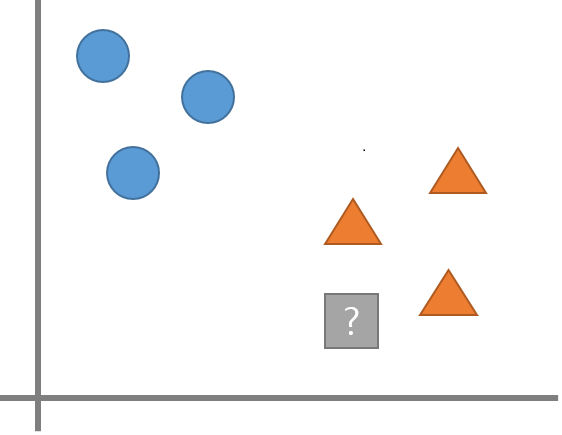

- K-NN에서 **K**는 새로운 데이터포인트를 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터**

- K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='blue'>주황색</font> 으로 분류한다.
- K가 너무 작으면 과적합(Overfitting)이 일어나고 K가 너무 크면 성능이 나빠진다. (Underfitting). 

## 주요 하이퍼 파라미터
- 이웃 수 
    - n_neighbors = K
    - **K가 작을 수록 모델이 복잡해져 과적합이 일어나고 너무 크면 단순해져 성능이 나빠진다.**
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- 거리 재는 방법 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값)
    - p=1: 맨하탄 거리(Manhattan distance)
    

> ### 유클리디안 거리(Euclidean_distance)
- L2 Norm
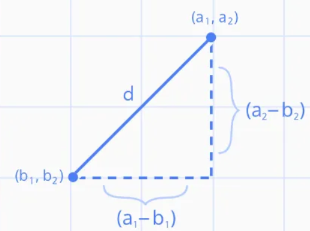

$$
distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
n차원 벡터간의 거리 = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
$$

> ### 맨하탄 거리 (Manhattan distance)
- L1 Norm
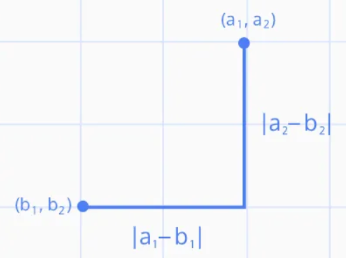

$$
distance = |a_1 - b_1| + |a_2 - b_2| \\
𝑛차원벡터간의거리= |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
$$

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.
- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.**
- 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
- Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Scaling작업**이 필요하다.
- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다

## 위스콘신 유방암 데이터를 이용한 암환자분류
### K값 변화에 따른 성능 평가
- malignant: 악성
- benign : 양성

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [2]:
# 전처리 - scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
X_train_scaled = X_train
X_test_scaled = X_test

In [4]:
# 모델링
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_scaled, y_train)
# 평가
pred_train = knn_clf.predict(X_train_scaled)
pred_test = knn_clf.predict(X_test_scaled)

In [5]:
accuracy_score(y_train, pred_train)

1.0

In [6]:
accuracy_score(y_test, pred_test)

0.916083916083916

In [7]:
train_acc_list = []
test_acc_list = []
k_param_list = range(1,10) # 1 ~9

for k in k_param_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    
    pred_train = clf.predict(X_train_scaled)
    pred_test = clf.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
# 데이터프레임(판다스)

In [8]:
d = {
    'K':k_param_list,
    'Train정확도':train_acc_list,
    'Test정확도':test_acc_list
}
result = pd.DataFrame(d)
result
# K값이 작을수록 복잡한 모델 - overfitting가능성 
# K값이 클수록 단순한 모델 - underfitting가능성

K  Train정확도   Test정확도
0  1  1.000000  0.916084
1  2  0.971831  0.923077
2  3  0.950704  0.937063
3  4  0.946009  0.937063
4  5  0.946009  0.930070
5  6  0.938967  0.944056
6  7  0.938967  0.937063
7  8  0.938967  0.944056
8  9  0.934272  0.951049

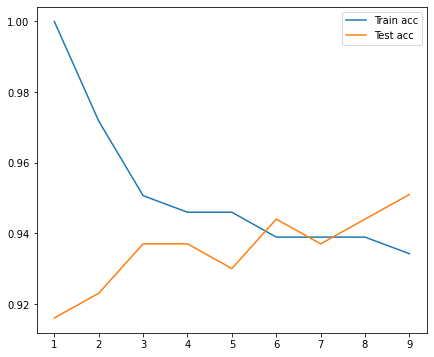

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(k_param_list, train_acc_list, label="Train acc")
plt.plot(k_param_list, test_acc_list, label='Test acc')
plt.legend()
plt.show()

In [10]:
X_train.shape

(426, 30)

In [11]:
np.sqrt(30)

5.477225575051661

## 파이프라인

In [13]:
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=4)

order = [
    ('scaler', scaler),
    ('knn', knn_clf)
]
pipeline = Pipeline(order)

In [14]:
# 학습
pipeline.fit(X_train, y_train)  # X_train = scaler.fit_tranform(X_train), 
                                # knn_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [15]:
pred_train = pipeline.predict(X_train)  # X_train = scaler.transform(X_train)
                                        # pred_train = knn_clf.predict(X_train)
pred_test = pipeline.predict(X_test)    # X_test = scaler.transform(X_test)
                                        # pred_train = knn_clf.predict(X_test)

In [16]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9859154929577465, 0.972027972027972)

## 그리드서치로 하이퍼파라미터 검색

In [17]:
from sklearn.model_selection import GridSearchCV 
param_grid = {
    "knn__n_neighbors":range(1,11),
    "knn__p":[1,2] #1:맨하탄, 2:유클리디안
}
gs = GridSearchCV(pipeline, 
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

In [19]:
gs.best_params_

{'knn__n_neighbors': 6, 'knn__p': 2}

In [20]:
pred_test = gs.predict(X_test)
accuracy_score(y_test, pred_test)

0.972027972027972

In [21]:
gs.score(X_test, y_test)

0.972027972027972

In [23]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       0.004188      0.000399         0.009774        0.003115   
15       0.004986      0.001411         0.009775        0.002224   
5        0.003790      0.000746         0.010372        0.002239   

   param_knn__n_neighbors param_knn__p                                params  \
11                      6            2  {'knn__n_neighbors': 6, 'knn__p': 2}   
15                      8            2  {'knn__n_neighbors': 8, 'knn__p': 2}   
5                       3            2  {'knn__n_neighbors': 3, 'knn__p': 2}   

    split0_test_score  split1_test_score  split2_test_score  \
11                1.0           0.988235           0.964706   
15                1.0           0.988235           0.952941   
5                 1.0           0.988235           0.964706   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
11           0.941176           0.988235         0.976471        0.021045   
15           0.941176           0.988235         0.974118        0.022813   
5            0.941176           0.976471         0.974118        0.020241   

    rank_test_score  
11                1  
15                2  
5                 2

## iris dataset 분류
- KNN. scaling(StandardScaler, MinMaxScaler) - KNN모델링
- 파이프라인
- gridsearch

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd

In [26]:
#데이터 조회 및 분리
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
print(X_train.shape, X_test.shape)

(150, 4) (150,)
(112, 4) (38, 4)


In [28]:
scaler = StandardScaler()
knn_clf = KNeighborsClassifier()
order = [
    ('scaler',scaler),
    ('knn', knn_clf)
]
pipeline = Pipeline(order)

In [29]:
# 학습
pipeline.fit(X_train, y_train)
# 평가
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9642857142857143, 0.9736842105263158)

In [30]:
param_grid = {
    'knn__n_neighbors':range(1, 11)
}
gs = GridSearchCV(pipeline, 
                  param_grid=param_grid,
                  cv = 5,
                  n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 11)})

In [31]:
gs.best_params_

{'knn__n_neighbors': 10}

In [32]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9       0.001397  4.819907e-04         0.002789        0.000398   
6       0.001995  7.136645e-07         0.002593        0.000488   
7       0.001197  3.988028e-04         0.002792        0.000399   
8       0.001795  3.986366e-04         0.002394        0.000488   
5       0.001597  4.885193e-04         0.002393        0.000488   

  param_knn__n_neighbors                    params  split0_test_score  \
9                     10  {'knn__n_neighbors': 10}           0.956522   
6                      7   {'knn__n_neighbors': 7}           0.956522   
7                      8   {'knn__n_neighbors': 8}           0.956522   
8                      9   {'knn__n_neighbors': 9}           0.956522   
5                      6   {'knn__n_neighbors': 6}           0.956522   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
9           0.826087                1.0           0.954545                1.0   
6           0.869565                1.0           0.909091                1.0   
7           0.869565                1.0           0.909091                1.0   
8           0.826087                1.0           0.909091                1.0   
5           0.869565                1.0           0.863636                1.0   

   mean_test_score  std_test_score  rank_test_score  
9         0.947431        0.063851                1  
6         0.947036        0.051268                2  
7         0.947036        0.051268                2  
8         0.938340        0.065408                4  
5         0.937945        0.060406                5